<a href="https://colab.research.google.com/github/aaryans99/CS-6375-Machine-Learning/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**6375 ML - Assignment 1**

Aaryan Singh - axc230019

Nikunj Gohil - ndg220000


---


To run the program, press the play button next to each code container.

Importing all the necessary libraries

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

Dataset - The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan.

Importing the dataset. And reading it into a dataframe.

---



In [87]:
url='https://github.com/aaryans99/CS-6375-Machine-Learning/raw/main/Assignment%201/Real%20estate%20valuation%20data%20set.csv'
data=pd.read_csv(url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


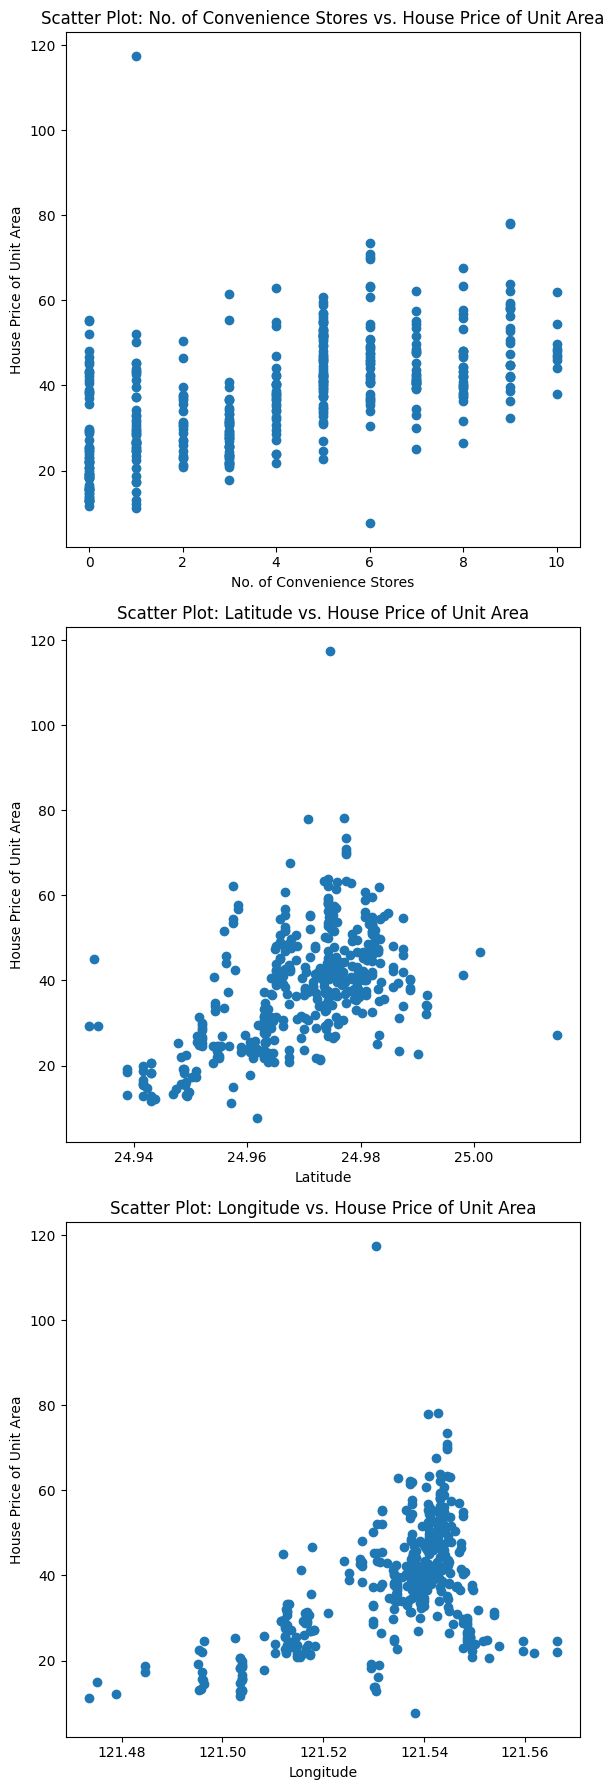

In [79]:
X_list = [data['X4 number of convenience stores'], data['X5 latitude'], data['X6 longitude']]
labels = ['No. of Convenience Stores', 'Latitude', 'Longitude']

fig, axs = plt.subplots(len(X_list), 1, figsize=(6, 6*len(X_list)))

for i, X in enumerate(X_list):
    y=data['Y house price of unit area']
    axs[i].scatter(X, y)
    axs[i].set_xlabel(labels[i])
    axs[i].set_ylabel('House Price of Unit Area')
    axs[i].set_title(f'Scatter Plot: {labels[i]} vs. House Price of Unit Area')

plt.tight_layout()
plt.show()


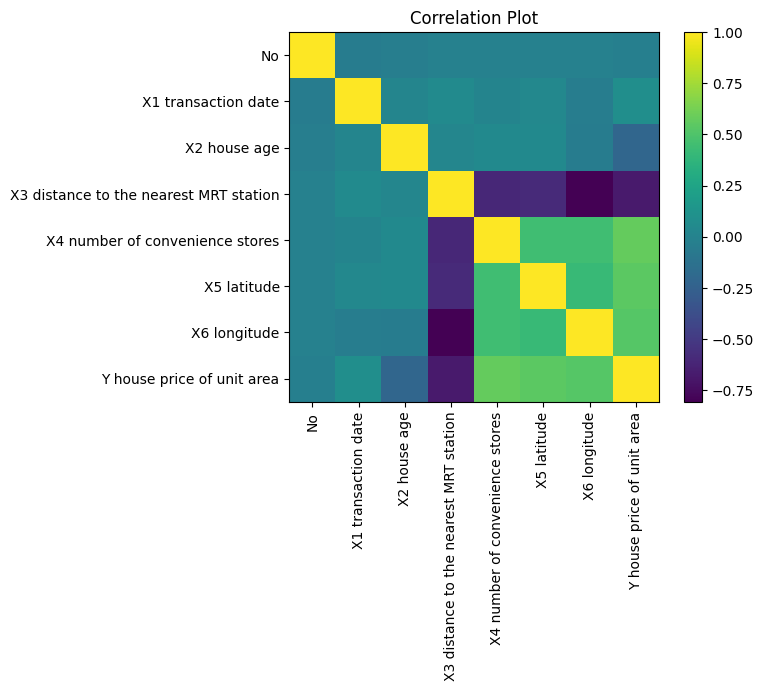

                                              No  X1 transaction date  \
No                                      1.000000            -0.048658   
X1 transaction date                    -0.048658             1.000000   
X2 house age                           -0.032808             0.017549   
X3 distance to the nearest MRT station -0.013573             0.060880   
X4 number of convenience stores        -0.012699             0.009635   
X5 latitude                            -0.010110             0.035058   
X6 longitude                           -0.011059            -0.041082   
Y house price of unit area             -0.028587             0.087491   

                                        X2 house age  \
No                                         -0.032808   
X1 transaction date                         0.017549   
X2 house age                                1.000000   
X3 distance to the nearest MRT station      0.025622   
X4 number of convenience stores             0.049593   
X5 lat

In [80]:
import matplotlib.pyplot as plt
corr_matrix = data.corr()
plt.imshow(corr_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation='vertical')
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Plot')
plt.show()

print(corr_matrix)

In [86]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    float64
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    float64
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(8)
memory usage: 26.0 KB
Training Set:
(331, 7)
(331,)

Testing Set:
(83, 7)
(83,)
Iteration: 1, Learning Rate: 0.0001
R2 - Training: -4.096579655461374, Testing: -3.934429784342747, RMSE - 

Text(0, 0.5, 'MSE')

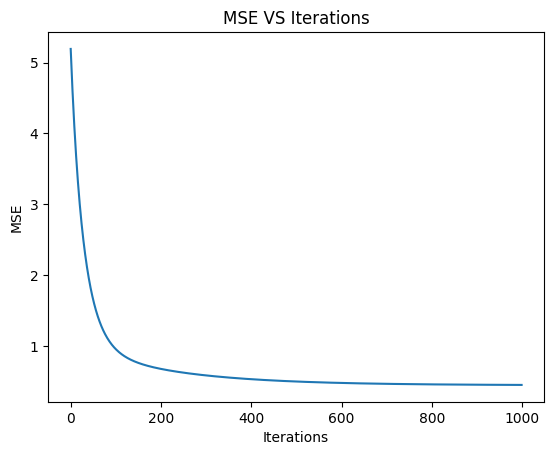

In [90]:
y=scaled_df['Y house price of unit area']
X=scaled_df.drop('Y house price of unit area',axis=1)
scaled_df.info()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set:")
print(np.shape(X_train))
print(np.shape(y_train))
print("\nTesting Set:")
print(np.shape(X_test))
print(np.shape(y_test))


def gradient_descent(X_train, y_train, X_test, y_test, iterations, learning_rate):
    m = np.ones(X_train.shape[1])
    c = 0
    n = X_train.shape[0]
    #Here n is the number of entries

    for i in range(iterations):
        y_predict_train = np.dot(X_train, m) + c
        Dm = -(2/n) * np.dot(X_train.T, (y_train-y_predict_train))
        Dc = -(2/n) * np.sum(y_train-y_predict_train)
        m  = m-learning_rate * Dm
        c  = c-learning_rate * Dc

    y_predict_train = np.dot(X_train, m) + c
    r2_train = r2_score(y_train, y_predict_train)
    rmse_train = mean_squared_error(y_train, y_predict_train)

    y_predict_test = np.dot(X_test, m) + c
    r2_test = r2_score(y_test, y_predict_test)
    rmse_test = mean_squared_error(y_test, y_predict_test)

    return r2_train, r2_test, rmse_train, rmse_test

iterations = 1
n = len(y)
learning_rates = [0.0001, 0.001, 0.005, 0.01]

for iteration in range(1, 7):
    for learning_rate in learning_rates:
        r2_train, r2_test, rmse_train, rmse_test = gradient_descent(X_train, y_train, X_test, y_test, iterations, learning_rate)
        iteration_info = f"Iteration: {iteration}, Learning Rate: {learning_rate}"
        scores_info = f"R2 - Training: {r2_train}, Testing: {r2_test}, RMSE - Training: {rmse_train}, Testing: {rmse_test}"
        print(iteration_info)
        print(scores_info)

iterations = 1000
learning_rate = 0.01
c=0
iterations_list = []
mse_array = []
m = np.ones(X.shape[1])

for i in range(iterations):
    pred_y_train = np.dot(X_train, m) + c
    Dm = -(2/n) * np.dot(X_train.T, (y_train-pred_y_train))
    Dc = -(2/n) * np.sum(y_train-pred_y_train)
    m  = m-learning_rate * Dm
    c  = c-learning_rate * Dc
    iterations_list.append(i)
    mse_array.append(mean_squared_error(pred_y_train, y_train
                                       ))
plt.plot(iterations_list, mse_array)
plt.title('MSE VS Iterations')
plt.xlabel('Iterations')
plt.ylabel('MSE')


In [91]:
rmse = (np.sqrt(mean_squared_error(y_train, pred_y_train)))
r2 = r2_score(y_train, pred_y_train)
print(f"Root Mean Squared Error is {rmse}")
print(f"R2 score is {r2}")


y_pred_test = X_test.dot(m)+c
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
r2 = r2_score(y_test, y_pred_test)
print(f"Root Mean Squared Error is {rmse}")
print(f"R2 score is {r2}")

Root Mean Squared Error is 0.6726011179502913
R2 score is 0.5557882109098589
Root Mean Squared Error is 0.5396137075878108
R2 score is 0.6794321475268381


**Implementing Linear Regression using Libraries**

Generating a model for predicting the y label "House price of unit area" using  SGD Regressor model of scikit. And testing the performance of that model.


---



In [93]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
# print(X_train.shape)
# print(X_test.shape)
# print(Y_train.shape)
# print(Y_test.shape)

model = SGDRegressor(alpha=0.0000001, eta0=0.001, max_iter = 10000000, tol = 0.000001)

model.fit(X_train, y_train)

print("Intercept: ", model.intercept_, "Coefficient: ", model.coef_)
# model evaluation for training set
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, pred_y_train)))
r2 = r2_score(y_train, pred_y_train)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
r2 = r2_score(y_test, y_pred_test)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Intercept:  [-0.00057789] Coefficient:  [-0.04839186  0.11044534 -0.22459917 -0.40686138  0.24290531  0.21474426
 -0.00584786]
The model performance for training set
--------------------------------------
RMSE is 0.6726011179502913
R2 score is 0.5557882109098589


The model performance for testing set
--------------------------------------
RMSE is 0.5396137075878108
R2 score is 0.6794321475268381


**6. Answer this question: Are you satisfied that you have found the best
solution? Explain.**

---

Ans:
No, we haven't found the best solution. Since regression problems are continuous in nature, one cannot say that the best model was generated without the means to back it up. To show that the model is best, one has to provide the different cases that were tested and what changes were made and how the current model outperforms the rest. And why a better model is not possible. And hence we say that our model is not the only one and not the best one. But, yes we are satisfied with the model generated as the values predicted are not deviating too much from the actual values and hence the errors are also small.